In [1]:
import pandas as pd


df = pd.read_csv('diabetes.csv')


print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# Get the number of records
num_records = df.shape[0]

print("Number of records in the Pima Indian Diabetes Dataset:", num_records)


Number of records in the Pima Indian Diabetes Dataset: 768


In [3]:
# Calculate the maximum age
max_age = df['Age'].max()

print("Maximum age of records in the Pima Indian Diabetes Dataset:", max_age)

Maximum age of records in the Pima Indian Diabetes Dataset: 81


In [4]:
# Calculate the number of missing values in the "pregnancies" column
missing_pregnancies = df['Pregnancies'].isnull().sum()

# Display the number of missing values in the "pregnancies" column
print("Missing values in the 'pregnancies' column:", missing_pregnancies)


Missing values in the 'pregnancies' column: 0


In [5]:
# Calculate the number of missing values in the "Glucose" column
missing_Glucose = df['Glucose'].isnull().sum()

# Display the number of missing values in the "Glucose" column
print("Missing values in the 'Glucose' column:", missing_Glucose)

Missing values in the 'Glucose' column: 0


In [6]:
# Calculate the number of missing values in the "Blood Pressure" column
missing_BloodPressure = df['BloodPressure'].isnull().sum()

# Display the number of missing values in the "Blood Pressure" column
print("Missing values in the 'Blood Pressure' column:", missing_BloodPressure)

Missing values in the 'Blood Pressure' column: 0


In [7]:
# Calculate the number of missing values in the "Skin Thickness" column
missing_SkinThickness = df['SkinThickness'].isnull().sum()

# Display the number of missing values in the "SkinThickness" column
print("Missing values in the 'SkinThickness' column:", missing_SkinThickness)

Missing values in the 'SkinThickness' column: 0


In [8]:
# Calculate the number of missing values in the "Insulin" column
missing_Insulin = df['Insulin'].isnull().sum()

# Display the number of missing values in the "Inslin" column
print("Missing values in the 'Insulin' column:", missing_Insulin)

Missing values in the 'Insulin' column: 0


In [9]:
# Calculate the number of missing values in the "BMI" column
missing_BMI = df['BMI'].isnull().sum()

# Display the number of missing values in the "BMI" column
print("Missing values in the 'BMI' column:", missing_BMI)

Missing values in the 'BMI' column: 0


In [10]:

# Calculate the number of missing values in the "DiabetesPedigreeFunction" column
missing_DiabetesPedigreeFunction = df['DiabetesPedigreeFunction'].isnull().sum()

# Display the number of missing values in the "DiabetesPedigreeFunction" column
print("Missing values in the 'DiabetesPedigreeFunction' column:", missing_DiabetesPedigreeFunction)

Missing values in the 'DiabetesPedigreeFunction' column: 0


In [11]:
# Calculate the number of missing values in the "Age" column
missing_Age = df['Age'].isnull().sum()

# Display the number of missing values in the "Age" column
print("Missing values in the 'Age' column:", missing_Age)

Missing values in the 'Age' column: 0


In [12]:
# Calculate the number of missing values in the "Outcome" column
missing_Outcome = df['Outcome'].isnull().sum()

# Display the number of missing values in the "Outcome" column
print("Missing values in the 'Outcome' column:", missing_Outcome)

Missing values in the 'Outcome' column: 0


In [13]:
import numpy as np
# Replace zero values with NaN
df.replace(0, np.nan, inplace=True)

# Now, all zero values in the DataFrame have been replaced with NaN



In [14]:
# Calculate the total number of NaN values
total_nan_values = df.isna().sum().sum()
print("Total NaN values in the dataset:", total_nan_values)


Total NaN values in the dataset: 1263


In [15]:
# Calculate the number of NaN values in each column
nan_values_per_column = df.isna().sum()
print("NaN values in each column:")
print(nan_values_per_column)


NaN values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [18]:

# Split the dataset into individuals with and without diabetes
diabetes_positive = df[df['Outcome'] == 1]
diabetes_negative = df[df['Outcome'] == 0]

# Calculate the proportion of individuals with diabetes for each age group
age_groups_positive = diabetes_positive.groupby(pd.cut(diabetes_positive['Age'], bins=range(0, 101, 10))).size()
age_groups_negative = diabetes_negative.groupby(pd.cut(diabetes_negative['Age'], bins=range(0, 101, 10))).size()

# Combine the counts of individuals with and without diabetes for each age group
age_groups_combined = pd.concat([age_groups_positive, age_groups_negative], axis=1)
age_groups_combined.columns = ['Diabetes Positive', 'Diabetes Negative']

# Calculate the proportion of individuals with diabetes for each age group
age_groups_combined['Diabetes Proportion'] = age_groups_combined['Diabetes Positive'] / (age_groups_combined['Diabetes Positive'] + age_groups_combined['Diabetes Negative'])

# Find the age group with the highest proportion of individuals with diabetes
max_prone_age_group = age_groups_combined['Diabetes Proportion'].idxmax()

print("Age group most prone to diabetes:", max_prone_age_group)


Age group most prone to diabetes: (20, 30]


Correlation coefficient between Pregnancies and Outcome: nan


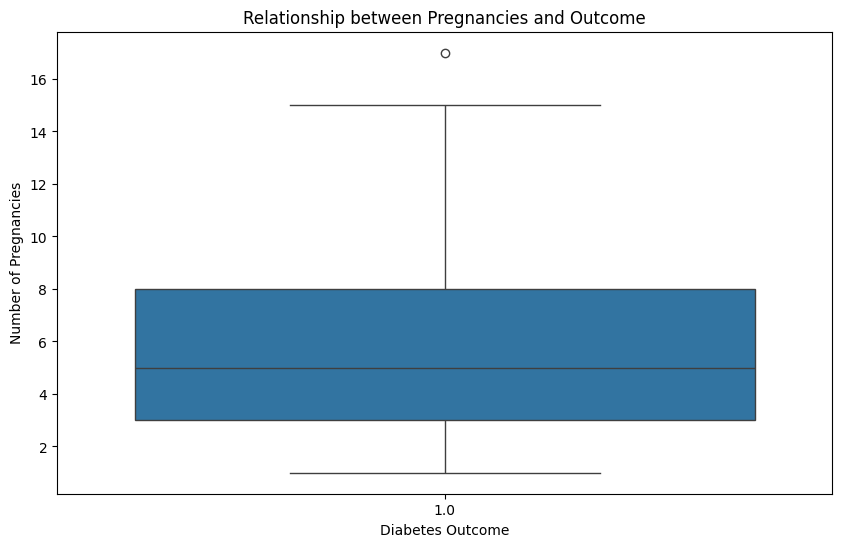

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Analysis
correlation = df['Pregnancies'].corr(df['Outcome'])
print("Correlation coefficient between Pregnancies and Outcome:", correlation)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Number of Pregnancies')
plt.title('Relationship between Pregnancies and Outcome')
plt.show()


Correlation coefficient between Glucose and Outcome: nan


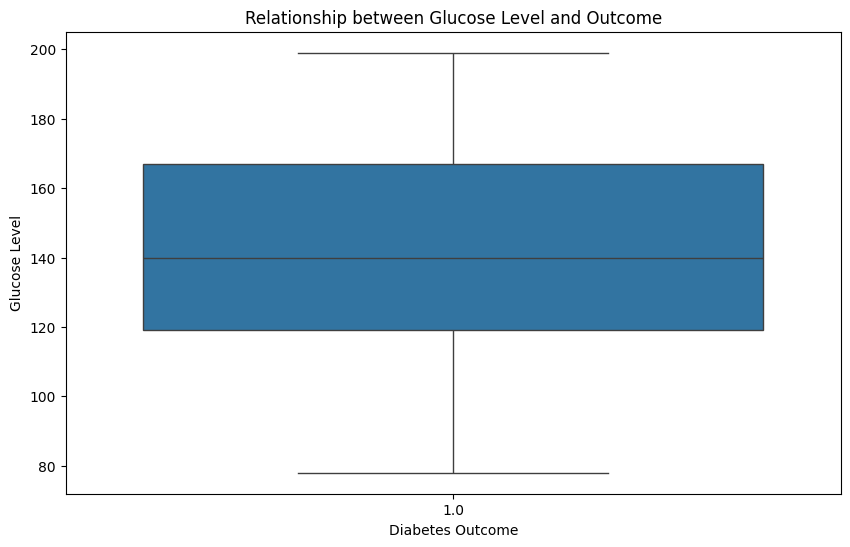

In [26]:

# Correlation Analysis
correlation = df['Glucose'].corr(df['Outcome'])
print("Correlation coefficient between Glucose and Outcome:", correlation)
You can perform logistic regression to model the relationship between Glucose and Outcome using libraries like scikit-learn.

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.title('Relationship between Glucose Level and Outcome')
plt.show()


Correlation coefficient between Blood Pressure and Outcome: nan


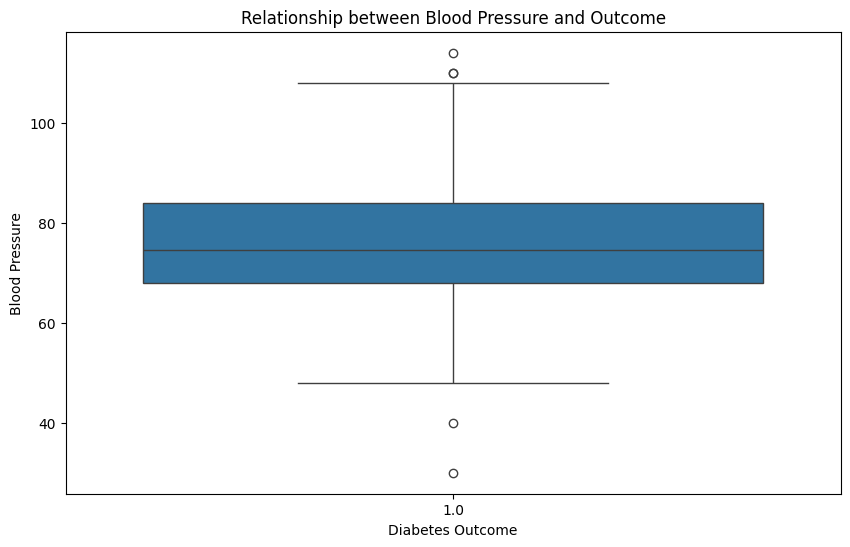

In [27]:

# Correlation Analysis
correlation = df['BloodPressure'].corr(df['Outcome'])
print("Correlation coefficient between Blood Pressure and Outcome:", correlation)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.title('Relationship between Blood Pressure and Outcome')
plt.show()


In [29]:
# Calculate the minimum and maximum values of skin thickness
min_skin_thickness = df['SkinThickness'].min()
max_skin_thickness = df['SkinThickness'].max()

print("Minimum Skin Thickness:", min_skin_thickness)
print("Maximum Skin Thickness:", max_skin_thickness)


Minimum Skin Thickness: 7.0
Maximum Skin Thickness: 99.0


Correlation coefficient between Skin Thickness and Outcome: nan


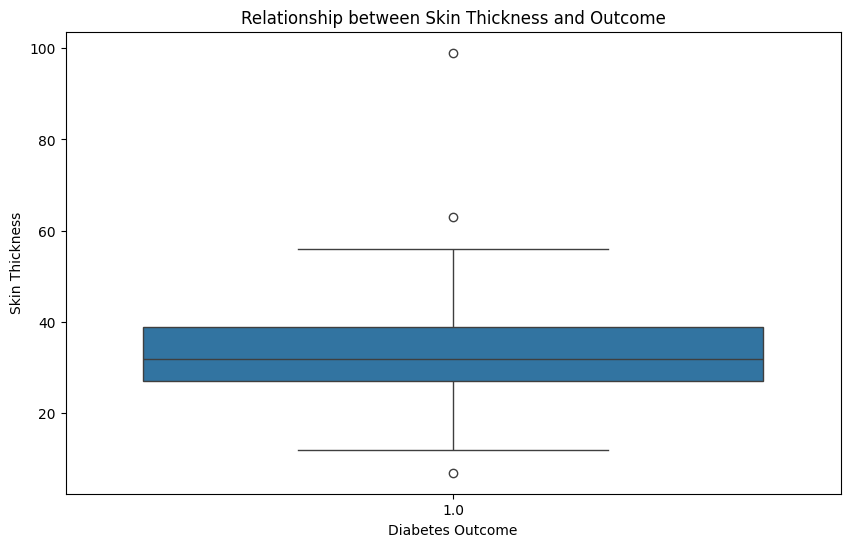

In [28]:

# Correlation Analysis
correlation = df['SkinThickness'].corr(df['Outcome'])
print("Correlation coefficient between Skin Thickness and Outcome:", correlation)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Skin Thickness')
plt.title('Relationship between Skin Thickness and Outcome')
plt.show()


Correlation coefficient between Insulin and Outcome: nan


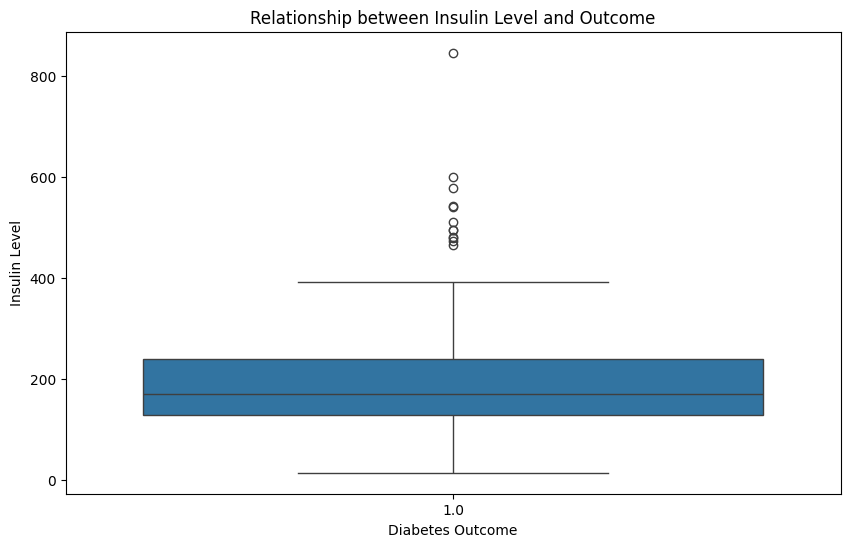

In [30]:

# Correlation Analysis
correlation = df['Insulin'].corr(df['Outcome'])
print("Correlation coefficient between Insulin and Outcome:", correlation)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Insulin Level')
plt.title('Relationship between Insulin Level and Outcome')
plt.show()


Correlation coefficient between BMI and Outcome: nan


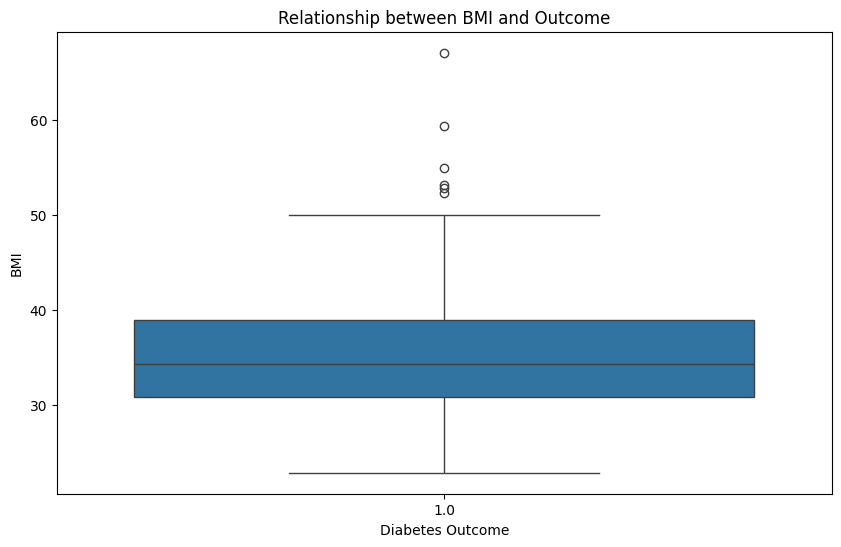

In [31]:

# Correlation Analysis
correlation = df['BMI'].corr(df['Outcome'])
print("Correlation coefficient between BMI and Outcome:", correlation)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.title('Relationship between BMI and Outcome')
plt.show()


Correlation coefficient between Diabetes Pedigree Function and Outcome: nan


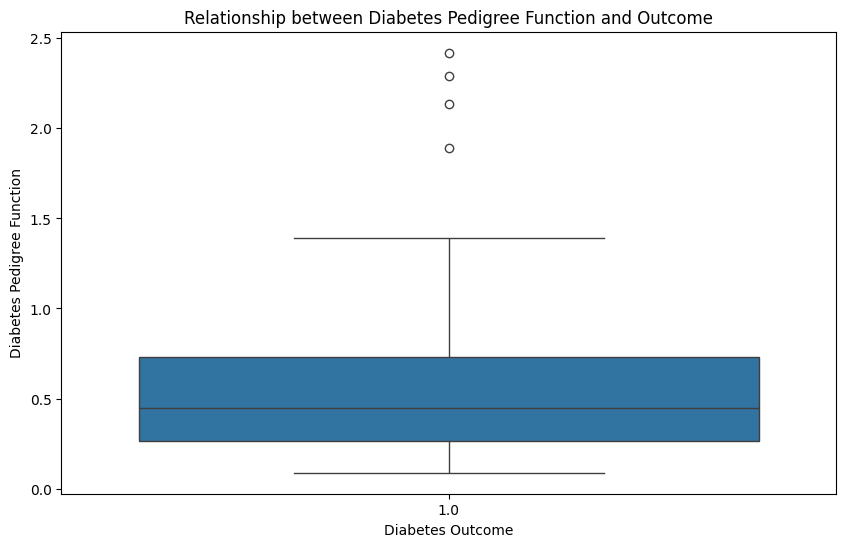

In [32]:

# Correlation Analysis
correlation = df['DiabetesPedigreeFunction'].corr(df['Outcome'])
print("Correlation coefficient between Diabetes Pedigree Function and Outcome:", correlation)

# Logistic Regression (optional)
# You can perform logistic regression to model the relationship between DPF and Outcome using libraries like scikit-learn.

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Diabetes Pedigree Function')
plt.title('Relationship between Diabetes Pedigree Function and Outcome')
plt.show()


Correlation coefficient between Age and Outcome: nan


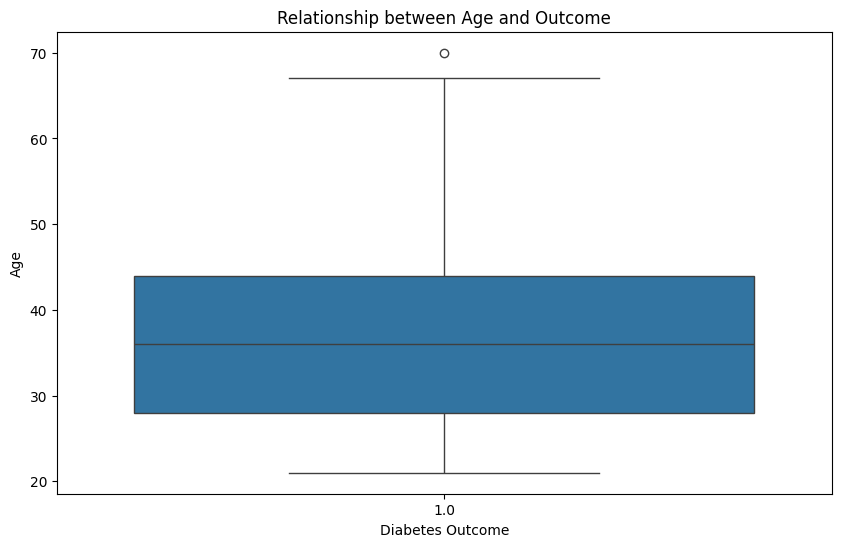

In [37]:

# Correlation Analysis
correlation = df['Age'].corr(df['Outcome'])
print("Correlation coefficient between Age and Outcome:", correlation)

# Logistic Regression (optional)
# You can perform logistic regression to model the relationship between Age and Outcome using libraries like scikit-learn.

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')
plt.title('Relationship between Age and Outcome')
plt.show()
